In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

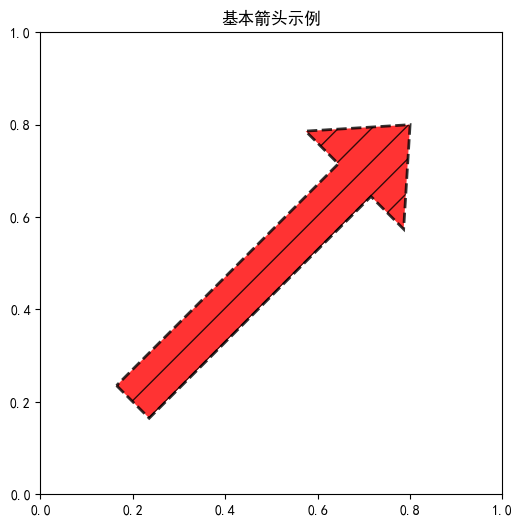

In [3]:
from matplotlib.patches import Arrow

fig, ax = plt.subplots(figsize=(8, 6))

# 绘制简单箭头
arrow = Arrow(0.2, 0.2,     # 箭头起点坐标 (x, y)
              0.6, 0.6,     # 箭头沿x轴和y轴的偏移量 (dx, dy)
              width=0.5,    # 箭头宽度的缩放因子
              fc='red',     # 箭头的填充颜色
              ec='black',   # 箭头的边框颜色
              lw=2,         # 箭头边框的线宽
              ls='--',      # 箭头边框的线型
              hatch='/',    # 箭头内部的填充图案
              alpha=0.8     # 箭头的透明度
)

# 将箭头添加到子图
ax.add_patch(arrow)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.title('基本箭头示例')
plt.show()

# 2、使用示例：

### 示例 1：定位与方向控制

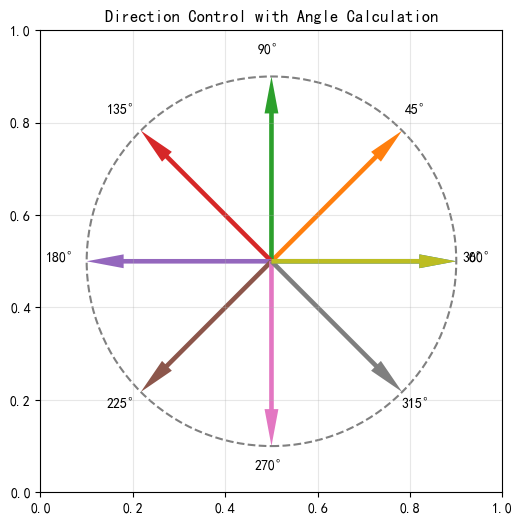

In [4]:
from matplotlib.patches import Arrow,Circle

fig, ax = plt.subplots(figsize=(10,6))

# 循环创建8个方向的箭头
for i, angle in enumerate(range(0,361,45)):
    rad = angle * np.pi / 180
    # 创建并添加箭头到子图
    ax.add_patch(Arrow(
                        0.5, 0.5,            # 所有箭头的起点均为画布中心
                        dx=0.4*np.cos(rad),  # x方向偏移量：根据余弦值计算，控制水平方向长度
                        dy=0.4*np.sin(rad),  # y方向偏移量：根据正弦值计算，控制垂直方向长度
                        width=0.05,          # 箭头宽度的缩放因子
                        fc=f'C{i}'           # 填充颜色：使用Matplotlib的默认颜色循环，C0到C8区分不同箭头
    ))
    
    # 在每个箭头的终点外侧添加角度文本标注
    ax.text(0.5+0.45*np.cos(rad), 0.5+0.45*np.sin(rad), 
            f'{angle}°', ha='center')

    
# 添加圆形对照（验证箭头端点在同一圆周上）
# 圆心与箭头起点相同(0.5, 0.5)，半径等于箭头长度
circle = Circle(
    xy=(0.5, 0.5),           # 圆心坐标
    radius=0.4,     # 半径：与箭头长度相同
    fill=False,              # 不填充
    linestyle='--',          # 虚线样式
    color='gray',            # 灰色：不抢眼但清晰可见
    linewidth=1.5            # 线宽
)
ax.add_patch(circle)

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.title('Direction Control with Angle Calculation')
ax.grid(True, alpha=0.3)
plt.show()

### 示例 2：在图表中标注数据点

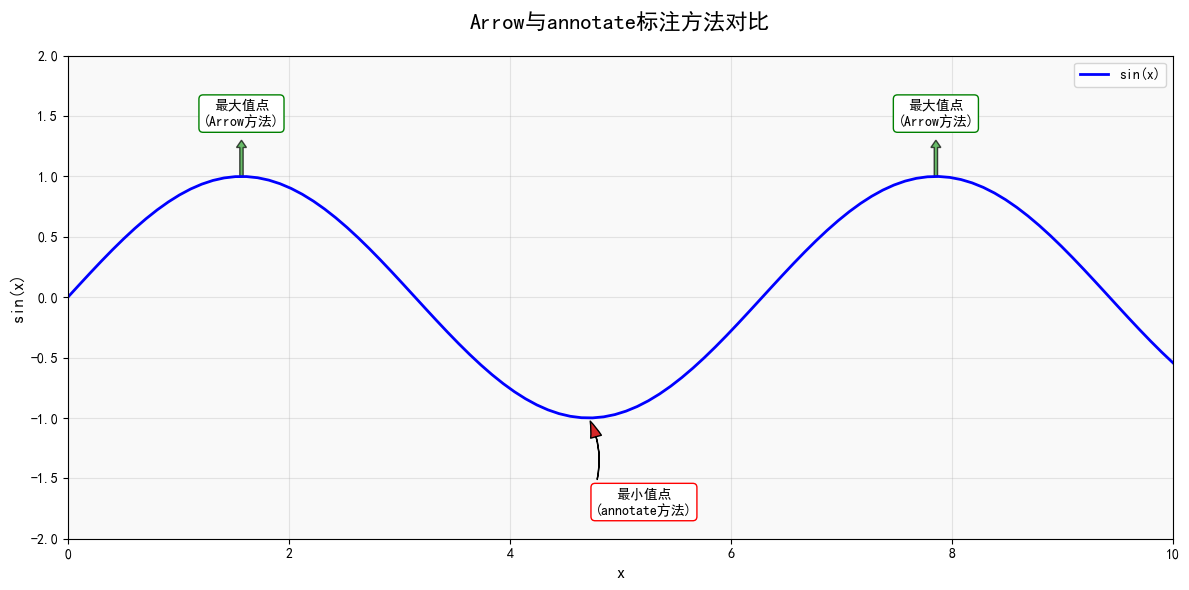

In [5]:
from matplotlib.patches import Arrow

# 创建示例数据
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(12, 6))

# 绘制正弦曲线
ax.plot(x, y, 'b-', linewidth=2, label='sin(x)')

# 定义关键点
critical_points = [
    (np.pi/2, np.sin(np.pi/2), '最大值点', 'Arrow方法'),
    (3*np.pi/2, np.sin(3*np.pi/2), '最小值点', 'annotate方法'),
    (5*np.pi/2, np.sin(5*np.pi/2), '最大值点', 'Arrow方法')
]

# 遍历关键点，使用两种方法标注
for i, (x_val, y_val, label, method) in enumerate(critical_points):
    if method == 'Arrow方法':
        # 使用Arrow类绘制箭头（需单独添加文本）       
        arrow = Arrow(
            x=x_val, y=y_val, 
            dx=0, dy=0.3, 
            width=0.15, 
            fc='#2ca02c',  
            ec='black', 
            alpha=0.7 
        )
        ax.add_patch(arrow)
        
        # 单独添加文本（需手动调整位置与箭头配合）
        text_y = y_val + 0.4
        ax.text(
            x_val, text_y,
            f'{label}\n({method})',
            ha='center',
            va='bottom' if y_val > 0 else 'top',
            fontsize=10,
            bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.3')
        )
    
    else:
        # 使用annotate方法（文本与箭头一体化）
        text_y = y_val - 0.8
    
        ax.annotate(
            text=f'{label}\n({method})',  # 标注文本
            xy=(x_val, y_val),            # 箭头指向的目标点
            xytext=(x_val + 0.5, text_y), # 文本位置
            arrowprops=dict(
                facecolor='#d62728',      # 红色箭头
                edgecolor='black',
                width=0.1,
                headwidth=8,
                shrink=0.05,              # 箭头与目标点的间距
                connectionstyle='arc3,rad=0.2'  # 曲线箭头
            ),
            ha='center',
            fontsize=10,
            bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3')
        )


ax.set_title('Arrow与annotate标注方法对比', fontsize=16, pad=20)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('sin(x)', fontsize=12)
ax.set_xlim(0, 10)
ax.set_ylim(-2, 2)
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_facecolor('#f9f9f9')
plt.tight_layout()
plt.show()

### 示例 3：多箭头组合,展示数据趋势

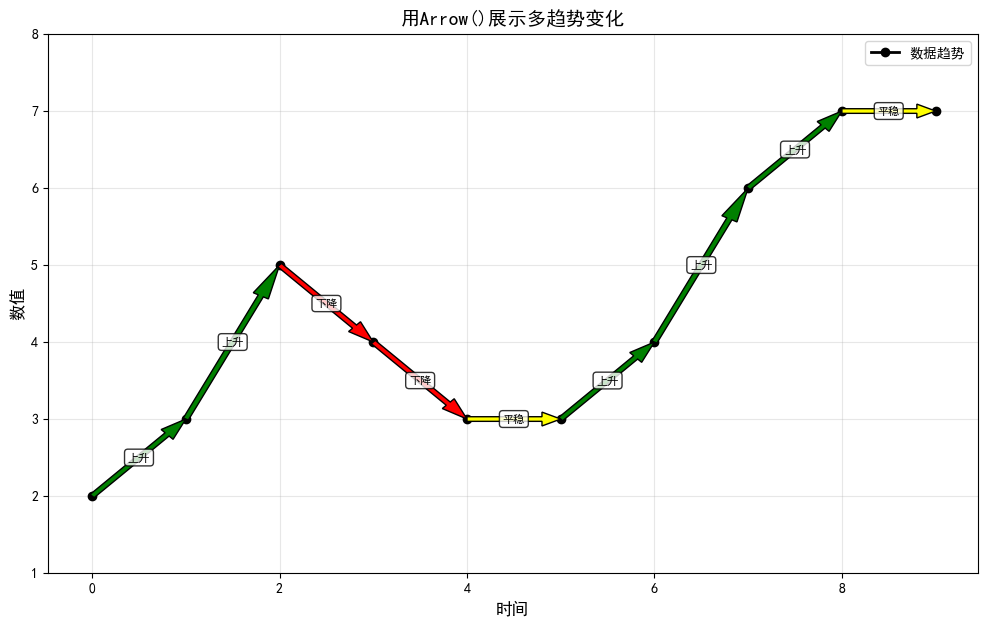

In [6]:
from matplotlib.patches import Arrow

# 生成趋势数据
x = np.arange(0, 10, 1)
y = [2, 3, 5, 4, 3, 3, 4, 6, 7, 7]  # 包含上升、下降、平稳趋势

fig, ax = plt.subplots(figsize=(12, 7))

# 绘制折线图
ax.plot(x, y, color='black', linewidth=2, marker='o', markersize=6, label='数据趋势')

# 循环判断趋势并绘制箭头
for i in range(len(x)-1):
    # 当前点与下一点坐标
    x1, y1 = x[i], y[i]
    x2, y2 = x[i+1], y[i+1]
    
    # 计算偏移量（dx=x2-x1，dy=y2-y1）
    dx = x2 - x1
    dy = y2 - y1
    
    # 根据dy判断趋势，设置箭头样式
    if dy > 0: 
        fc = 'green'
        trend = '上升'
    elif dy < 0: 
        fc = 'red'
        trend = '下降'
    else: 
        fc = 'yellow'
        trend = '平稳'
    
    # 绘制箭头（起点为当前点，偏移量为dx、dy）
    arrow = Arrow(
        x=x1, y=y1,
        dx=dx, dy=dy,
        width=0.3,
        fc=fc,
        ec='black',
        # alpha=alpha,
        zorder=100
    )
    ax.add_patch(arrow)
    
    # 添加趋势文本（箭头中间位置）
    ax.text(
        x1 + dx/2, y1 + dy/2,
        trend,
        fontsize=8,
        ha='center',
        va='center',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),  # 白色背景框
        zorder=110
    )

ax.set_xlabel('时间', fontsize=12)
ax.set_ylabel('数值', fontsize=12)
ax.set_title('用Arrow()展示多趋势变化', fontsize=14)
ax.set_ylim(1, 8)  # 调整y轴范围，避免箭头超出
ax.legend()
ax.grid(alpha=0.3)
plt.show()